## Marie_Pigott_MLB/DVis_CA2

The following is the notebook for the combined CA for Data Visualtisation and Machine Learning for Business. The dataset I have chosen to use for Time Series analysis and data visualisation from the Kaggle Website. It is a dataset of real interest rates across the world from 1961-2021 (data varies for each country). This dataset is also used for the Data Visualisation part of the assessment. FOr th etext processing part I used a different dataset, also from Kaggle on social media text from Reddit. 

### Machine Learning for Business - Time Series 

Apply an appropriate Box-Jenkins model to the chosen dataset (ARMA, ARIMA, SARIMA etc). Check for the model adequacy.

In [128]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import plotly.express as px
import statsmodels.tsa.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
import numpy as np
import statsmodels.api as sm
import itertools
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_table
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import sklearn.feature_extraction.text as sk_txt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
import sklearn.feature_extraction.text as sk_text
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import altair as alt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
import pickle 
import panel as pn
import dash
from dash import dcc, html
from dash_table import DataTable
from dash import dcc, html
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
!pip install "pandas<2.0.0"
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install pyLDAvis
!pip install --upgrade numexpr bottleneck
!pip install --upgrade pandas
!pip install --upgrade joblib

[nltk_data] Downloading package stopwords to /Users/MP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Using cached pandas-1.5.3-cp39-cp39-macosx_10_9_x86_64.whl (12.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.26.2 which is incompatible.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.11.4 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
  Using cached pandas-2.1.3-cp39-cp39-macosx_10_9_x86_64.whl (11.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstal

In [2]:
df = pd.read_csv('real_interest_rate_by_country.csv')

In [3]:
df.rename(columns={'real_interest_rate_by_country.csv': 'interest.csv'}, inplace=True)

In [4]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1987,6.475434
1,ABW,Aruba,1988,6.918180
2,ABW,Aruba,1989,6.264234
3,ABW,Aruba,1990,4.566641
4,ABW,Aruba,1991,4.791125


In [5]:
df.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [6]:
df.shape

(4576, 4)

In [7]:
df = df.drop(columns=['country_code'])

In [8]:
df.rename(columns={'country_name': 'country'}, inplace=True)

In [9]:
df.rename(columns={'value': 'interest'}, inplace=True)

In [10]:
df.head()

,country,year,interest
0,Aruba,1987,6.475434
1,Aruba,1988,6.918180
2,Aruba,1989,6.264234
3,Aruba,1990,4.566641
4,Aruba,1991,4.791125


In [11]:
df.shape

(4576, 3)

In [12]:
# Print unique values in the 'year' column
unique_years = df['year'].unique()
print("Unique values in 'year' column:", unique_years)

# Sum the total number of unique values
total_unique_values = len(unique_years)
print("Total number of unique values in 'year' column:", total_unique_values)

Unique values in 'year' column: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 1986 1978 1979 1980 1981 1982 1983
 1984 1985 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977]
Total number of unique values in 'year' column: 61


In [13]:
# Print unique values in the 'country' column
unique_years = df['country'].unique()
print("Unique values in 'country' column:", unique_years)

# Sum the total number of unique values
total_unique_values = len(unique_years)
print("Total number of unique values in 'country' column:", total_unique_values)

Unique values in 'country' column: ['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Azerbaijan' 'Burundi' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bolivia' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Canada' 'Switzerland' 'Chile'
 'China' "Cote d'Ivoire" 'Congo, Dem. Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Czechia' 'Dominica' 'Dominican Republic'
 'Algeria' 'Egypt, Arab Rep.' 'Ethiopia' 'Fiji' 'Micronesia, Fed. Sts.'
 'United Kingdom' 'Georgia' 'Guinea' 'Gambia, The' 'Guinea-Bissau'
 'Grenada' 'Guatemala' 'Guyana' 'Hong Kong SAR, China' 'Honduras'
 'Croatia' 'Haiti' 'Hungary' 'Indonesia' 'India' 'Iran, Islamic Rep.'
 'Iraq' 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Japan' 'Kenya'
 'Kyrgyz Republic' 'St. Kitts and Nevis' 'Korea, Rep.' 'Kuwait' 'Lao PDR'
 'Lebanon' 'Liberia' 'Libya' 'St. Lucia' 'Sri Lanka' 'Lesotho'
 'Macao

In [14]:
df.describe()

,year,interest
count,4576.000000,4576.000000
mean,2002.397072,6.158481
std,12.484916,26.120630
min,1961.000000,-97.693477
25%,1994.000000,1.773144
50%,2004.000000,5.579257
75%,2012.000000,9.826362
max,2021.000000,1158.026425


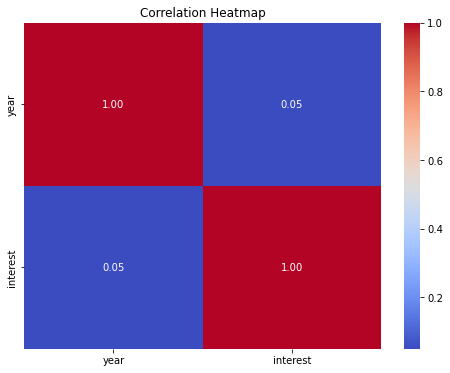

In [15]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Correlation heatmap
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

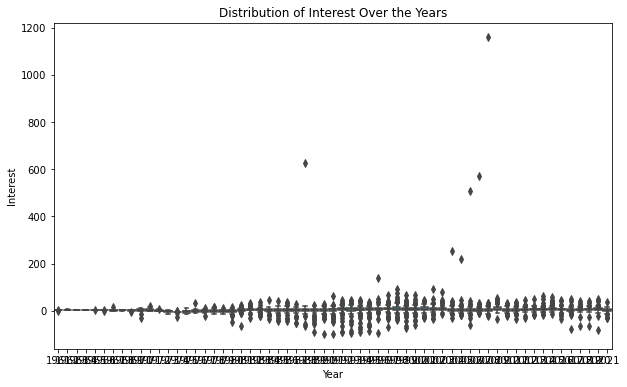

In [16]:
# Box plot to visualize the distribution of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='interest', data=df)
plt.title('Distribution of Interest Over the Years')
plt.xlabel('Year')
plt.ylabel('Interest')
plt.show()

In [17]:
# Count the number of unique values in the 'country' column
unique_countries = df['country'].nunique()

print(f"Number of unique values in the 'country' column: {unique_countries}")

Number of unique values in the 'country' column: 148


In [18]:
missing_values = df['interest'].isnull().sum()
print(f'Number of missing values in the interest column: {missing_values}')

Number of missing values in the interest column: 0


In [19]:
print(df['interest'].dtype)

float64


In [125]:
with pd.option_context('mode.use_inf_as_null', True):
    # Line plot
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='year', y='interest', hue='country', data=df, marker='o')
    plt.title('Line Plot of Interest Over Years by Country')
    plt.xlabel('Year')

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

In [126]:
# Line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='interest', hue='country', data=df, marker='o')
plt.title('Line Plot of Interest Over Years by Country')
plt.xlabel('Year')

ValueError: Could not interpret value `year` for parameter `x`

<Figure size 864x576 with 0 Axes>

In [127]:
# Interactive scatter plot with hover
fig = px.scatter(df, x='year', y='interest', color='country', size_max=10, title='Scatter Plot of Interest Over Years by Country')
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Interest')

# Show the interactive plot
fig.show()

ValueError: DataFrame constructor not properly called!

In [22]:
# Drop rows where 'country' is 'Zimbabwe'
df = df[df['country'] != 'Zimbabwe']

In [23]:
# Drop rows where 'country' is 'Nicaragua'
df = df[df['country'] != 'Nicaragua']

In [24]:
# Drop rows where 'country' is 'Bulgaria'
df = df[df['country'] != 'Bulgaria']

In [25]:
# Interactive scatter plot with hover
fig = px.scatter(df, x='year', y='interest', color='country', size_max=10, title='Scatter Plot of Interest Over Years by Country')
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Interest')

# Show the interactive plot
fig.show()

In [67]:
# Interactive scatter plot with hover
fig = px.scatter(df, x='year', y='interest', color='country', size_max=10, title='Scatter Plot of Interest Over Years by Country')
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Interest')

# Save the plot as an HTML file with the name 'scatter_plot.html'
fig.write_html('scatter_plot.html')

# Show the interactive plot
fig.show()

In [26]:
# Create an interactive line plot for the change in interest rate over time for all countries
fig = px.line(df, x='year', y='interest', color='country', title='Change in Interest Rate Over Time',
              labels={'interest': 'Interest Rate', 'year': 'Year'},
              line_group='country', hover_name='country')

# Show the interactive plot
fig.show()

### ARMA
Auto Regressive Moving Average is a statistical model to model time series data. 

In [27]:
adfuller(df["interest"])

(-9.283221197316802,
 1.2350238579029547e-15,
 31,
 4439,
 {'1%': -3.431823999890399,
  '5%': -2.862191330446143,
  '10%': -2.5671167070962335},
 32698.260669080122)

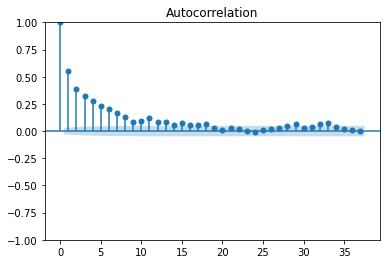

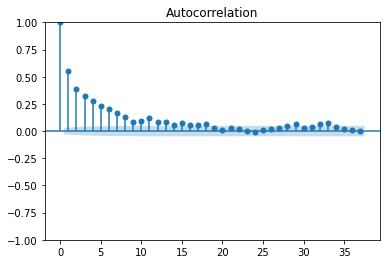

In [28]:
plot_acf(df["interest"])

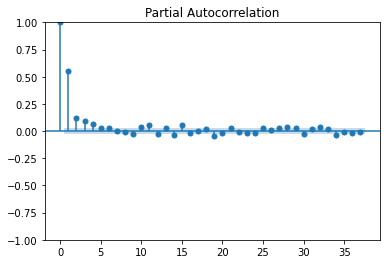

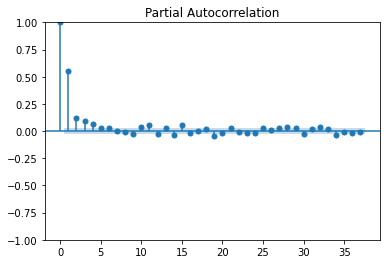

In [29]:
plot_pacf(df["interest"], method='ywm')

In [30]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA( df["interest"], order=(p, 0, q) ).fit().aic, p, q   ] )

In [31]:
aicVals

[[34716.68469568459, 0, 0],
 [33565.49887667812, 0, 1],
 [33279.8016991928, 0, 2],
 [33167.0117276991, 0, 3],
 [33089.675386801624, 0, 4],
 [33075.29593106857, 1, 0],
 [32986.46965969767, 1, 1],
 [32953.735754126246, 1, 2],
 [32954.90720198136, 1, 3],
 [32956.15285265171, 1, 4],
 [33016.65586159774, 2, 0],
 [32954.73095041013, 2, 1],
 [32955.07950771416, 2, 2],
 [32955.76618182061, 2, 3],
 [32957.67620852206, 2, 4],
 [32978.279396245794, 3, 0],
 [32954.836630551086, 3, 1],
 [32956.404458133904, 3, 2],
 [32958.262680254265, 3, 3],
 [32959.712568559116, 3, 4],
 [32960.377736754715, 4, 0],
 [32956.26165165223, 4, 1],
 [32957.78368280588, 4, 2],
 [32959.86092974995, 4, 3],
 [32960.745348697405, 4, 4]]

In [32]:
aicVals.sort()

In [33]:
aicVals

[[32953.735754126246, 1, 2],
 [32954.73095041013, 2, 1],
 [32954.836630551086, 3, 1],
 [32954.90720198136, 1, 3],
 [32955.07950771416, 2, 2],
 [32955.76618182061, 2, 3],
 [32956.15285265171, 1, 4],
 [32956.26165165223, 4, 1],
 [32956.404458133904, 3, 2],
 [32957.67620852206, 2, 4],
 [32957.78368280588, 4, 2],
 [32958.262680254265, 3, 3],
 [32959.712568559116, 3, 4],
 [32959.86092974995, 4, 3],
 [32960.377736754715, 4, 0],
 [32960.745348697405, 4, 4],
 [32978.279396245794, 3, 0],
 [32986.46965969767, 1, 1],
 [33016.65586159774, 2, 0],
 [33075.29593106857, 1, 0],
 [33089.675386801624, 0, 4],
 [33167.0117276991, 0, 3],
 [33279.8016991928, 0, 2],
 [33565.49887667812, 0, 1],
 [34716.68469568459, 0, 0]]

In [34]:
model = sm.ARIMA(df["interest"], order=(1, 0 , 0)).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               interest   No. Observations:                 4471
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -16534.648
Date:                Sun, 26 Nov 2023   AIC                          33075.296
Time:                        15:35:18   BIC                          33094.512
Sample:                             0   HQIC                         33082.069
                               - 4471                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4255      0.346     15.666      0.000       4.747       6.104
ar.L1          0.5546      0.006     98.160      0.000       0.544       0.566
sigma2        95.4551      0.695    137.261      0.000      94.092      96.818
===================================================================================
Ljung-Box (L1) (Q):                  18.51   Jarque-Bera (JB):             47933.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
pred_time = 20
result = model.predict(pred_time)

In [37]:
result

20      5.639983
21      5.181154
22      5.733551
23      7.322329
24      8.882537
          ...   
4530    5.843540
4531    3.367571
4532    3.564568
4533    3.645324
4534    3.786096
Name: predicted_mean, Length: 4451, dtype: float64

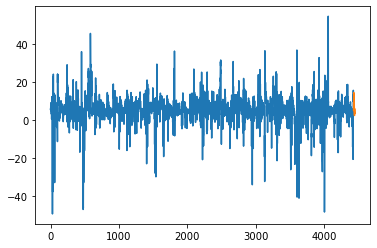

In [38]:
# Assuming 'result' is a Pandas Series
result_array = np.array(result)

# Assuming 'pred_time' is defined
plt.plot(range(len(result_array) - pred_time), result_array[:-pred_time])
plt.plot(range(len(result_array) - pred_time, len(result_array)), result_array[-pred_time:])

plt.show()

In [39]:
df ["Diff1"] = df["interest"].diff(1)

In [40]:
df["interest"]

0       6.475434
1       6.918180
2       6.264234
3       4.566641
4       4.791125
          ...   
4530    1.715079
4531    2.070262
4532    2.215865
4533    2.469674
4534   -3.749081
Name: interest, Length: 4471, dtype: float64

In [41]:
df["Diff1"].drop(0)

1       0.442746
2      -0.653946
3      -1.697593
4       0.224484
5       1.737012
          ...   
4530   -4.464136
4531    0.355183
4532    0.145603
4533    0.253809
4534   -6.218755
Name: Diff1, Length: 4470, dtype: float64

In [42]:
df["Diff1"].drop(0).plot

In [43]:
print(df["Diff1"].isnull().sum())

1


In [44]:
df.dropna(inplace=True)

In [45]:
print(df["Diff1"].isnull().sum())

0


In [46]:
adfuller(df["Diff1"])

(-19.794797493283223,
 0.0,
 31,
 4438,
 {'1%': -3.4318243322143682,
  '5%': -2.8621914772569323,
  '10%': -2.567116785250736},
 32770.53675012573)

In [47]:
df.iloc[598]

country      Bolivia
year            2020
interest    9.625097
Diff1        0.46911
Name: 629, dtype: object

In [48]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA( df["interest"], order=(p, 0, q) ).fit().aic, p, q   ] )

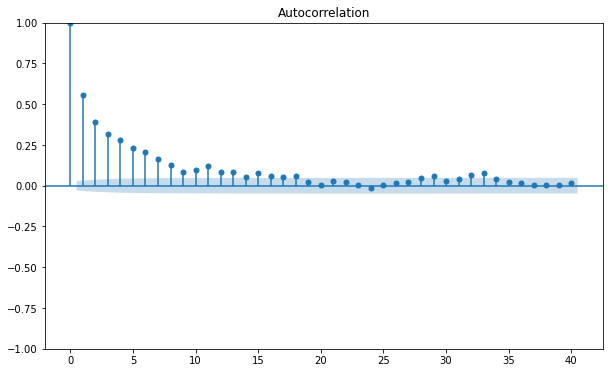

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot autocorrelation
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df['interest'], lags=40, ax=ax)
plt.show()

#### SARIMA

In [50]:
# Assuming 'interest' is the column in your DataFrame
# Example: df['interest'] = your_time_series_data

# Define the p, d, q parameters
p = d = q = range(2)
# Generate all different combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Define the seasonal P, D, Q parameters
P = D = Q = range(2)
# Generate all different combinations of P, D, Q
seasonal_pdq = list(itertools.product(P, D, Q))

aicVals = []

# Iterate through all possible combinations
for param in pdq:
    for param_seasonal in seasonal_pdq:
        # SARIMAX model
        model = SARIMAX(df["interest"], order=(param[0], param[1], param[2]), seasonal_order=(param_seasonal[0], param_seasonal[1], param_seasonal[2], 12))
        results = model.fit()
        aicVals.append([results.aic, param[0], param[1], param[2], param_seasonal[0], param_seasonal[1], param_seasonal[2]])

# Find the minimum AIC
min_aic = min(aicVals, key=lambda x: x[0])
print(f"Minimum AIC: {min_aic}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97884D+00    |proj g|=  5.97300D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.973D-08   3.979D+00
  F =   3.9788427827741999     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.9

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95437D+00    |proj g|=  1.37554D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   3.470D-06   3.954D+00
  F =   3.9540012763133707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17596D+00    |proj g|=  1.68700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.220D-06   4.176D+00
  F =   4.1759621852731259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94862D+00    |proj g|=  7.50543D-02

At iterate    5    f=  3.88226D+00    |proj g|=  2.13576D-03

At iterate   10    f=  3.87996D+00    |proj g|=  3.94316D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     14      1     0     0   4.505D-06   3.880D+00
  F =   3.8799525346761374     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   8.370D-06   3.948D+00
  F =   3.9484740630340904     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95525D+00    |proj g|=  1.72202D-01


 This problem is unconstrained.



At iterate    5    f=  3.93586D+00    |proj g|=  5.71073D-02

At iterate   10    f=  3.91042D+00    |proj g|=  2.56175D-02

At iterate   15    f=  3.89390D+00    |proj g|=  2.30886D-03

At iterate   20    f=  3.88920D+00    |proj g|=  1.11339D-03

At iterate   25    f=  3.88824D+00    |proj g|=  1.76147D-04
  ys=-2.777E-05  -gs= 1.573E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     54      1     1     0   4.493D-05   3.888D+00
  F =   3.8882418590741423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06413D+00    |proj g|=  1.00045D-03

At iterate    5    f=  4.06413D+00    |proj g|=  3.65872D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   3.765D-06   4.064D+00
  F =   4.0641270223101573     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  3.88213D+00    |proj g|=  1.27015D-02

At iterate   10    f=  3.87683D+00    |proj g|=  6.38836D-04

At iterate   15    f=  3.87669D+00    |proj g|=  3.65135D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   7.700D-07   3.877D+00
  F =   3.8766883211252319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82156D+00    |proj g|=  3.75491D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81701D+00    |proj g|=  5.17543D-02

At iterate    5    f=  3.80972D+00    |proj g|=  4.08755D-02

At iterate   10    f=  3.80740D+00    |proj g|=  3.64686D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   3.647D-07   3.807D+00
  F =   3.8074000585169072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   3.997D-08   4.077D+00
  F =   4.0769518454083711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89058D+00    |proj g|=  5.67364D-02

At iterate    5    f=  3.75213D+00    |proj g|=  2.28605D-02

At iterate   10    f=  3.75175D+00    |proj g|=  2.82113D-03

At iterate   15    f=  3.75146D+00    |proj g|=  2.78395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   5.092D-06   3.751D+00
  F =   3.7514568600120324     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82364D+00    |proj g|=  1.02458D-01

At iterate    5    f=  3.80932D+00    |proj g|=  5.06544D-02

At iterate   10    f=  3.80628D+00    |proj g|=  2.03289D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   6.328D-07   3.806D+00
  F =   3.8062800799959700     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81362D+00    |proj g|=  5.56429D-02

At iterate    5    f=  3.79602D+00    |proj g|=  4.53310D-02

At iterate   10    f=  3.77383D+00    |proj g|=  1.46623D-02

At iterate   15    f=  3.76288D+00    |proj g|=  3.03063D-03

At iterate   20    f=  3.75988D+00    |proj g|=  3.17803D-03

At iterate   25    f=  3.75886D+00    |proj g|=  1.78655D-03
  ys=-5.602E-05  -gs= 1.279E-05 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   30    f=  3.75881D+00    |proj g|=  6.55535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     61      1     1     0   6.555D-04   3.759D+00
  F =   3.7588078537115677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97173D+00    |proj g|=  1.90296D-02


 This problem is unconstrained.



At iterate    5    f=  3.95111D+00    |proj g|=  5.97090D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   7.998D-06   3.949D+00
  F =   3.9489402895754808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90949D+00    |proj g|=  8.37711D-02


 This problem is unconstrained.



At iterate    5    f=  3.76170D+00    |proj g|=  2.69834D-02

At iterate   10    f=  3.75129D+00    |proj g|=  1.01323D-04

At iterate   15    f=  3.75127D+00    |proj g|=  1.53569D-03

At iterate   20    f=  3.75125D+00    |proj g|=  1.21234D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   1.212D-05   3.751D+00
  F =   3.7512543647729633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82250D+00    |proj g|=  1.01123D-03

At iterate    5    f=  3.82249D+00    |proj g|=  3.78142D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   3.781D-07   3.822D+00
  F =   3.8224896980194591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89216D+00    |proj g|=  6.28663D-02


 This problem is unconstrained.



At iterate    5    f=  3.82526D+00    |proj g|=  3.20904D-03

At iterate   10    f=  3.82149D+00    |proj g|=  9.05540D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     15      1     0     0   5.964D-06   3.821D+00
  F =   3.8214092815981342     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82256D+00    |proj g|=  2.31416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   1.405D-06   3.823D+00
  F =   3.8225613690007738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82255D+00    |proj g|=  3.73296D-03

At iterate    5    f=  3.82239D+00    |proj g|=  1.04407D-02

At iterate   10    f=  3.82213D+00    |proj g|=  9.13777D-03

At iterate   15    f=  3.82197D+00    |proj g|=  2.70254D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   8.774D-07   3.822D+00
  F =   3.8219674321897843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03568D+00    |proj g|=  1.04061D-03

At iterate    5    f=  4.03567D+00    |proj g|=  2.57140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   3.051D-06   4.036D+00
  F =   4.0356730706021544     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  3.82685D+00    |proj g|=  2.52829D-02

At iterate   10    f=  3.82081D+00    |proj g|=  6.31491D-04

At iterate   15    f=  3.82050D+00    |proj g|=  2.13993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   5.481D-07   3.820D+00
  F =   3.8204978584049707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73726D+00    |proj g|=  7.15169D-02

At iterate    5    f=  3.72945D+00    |proj g|=  1.65262D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   3.758D-07   3.729D+00
  F =   3.7294458096190994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  3.72925D+00    |proj g|=  4.24475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.994D-07   3.729D+00
  F =   3.7291994436128548     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08021D+00    |proj g|=  5.56482D-02


 This problem is unconstrained.



At iterate    5    f=  4.07629D+00    |proj g|=  2.26343D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     11      1     0     0   4.644D-07   4.076D+00
  F =   4.0762639499174362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86334D+00    |proj g|=  4.17384D-02

At iterate    5    f=  3.73143D+00    |proj g|=  4.83156D-03

At iterate   10    f=  3.72778D+00    |proj g|=  2.40930D-04

At iterate   15    f=  3.72751D+00    |proj g|=  3.38984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   6.552D-06   3.728D+00
  F =   3.7275006466920599     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73733D+00    |proj g|=  7.10057D-02

At iterate    5    f=  3.72929D+00    |proj g|=  4.08799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   6.166D-06   3.729D+00
  F =   3.7292253946966136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  3.72929D+00    |proj g|=  1.77475D-03

At iterate   10    f=  3.72891D+00    |proj g|=  7.17246D-03

At iterate   15    f=  3.72841D+00    |proj g|=  7.11681D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   3.186D-06   3.728D+00
  F =   3.7284139052436855     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96392D+00    |proj g|=  3.61166D-02

At iterate    5    f=  3.94390D+00    |proj g|=  3.03686D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.650D-06   3.943D+00
  F =   3.9429612082082981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88766D+00    |proj g|=  7.73305D-02

At iterate    5    f=  3.72992D+00    |proj g|=  1.65375D-02

At iterate   10    f=  3.72776D+00    |proj g|=  5.39081D-03

At iterate   15    f=  3.72727D+00    |proj g|=  4.20713D-04

At iterate   20    f=  3.72727D+00    |proj g|=  8.09091D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   8.091D-06   3.727D+00
  F =   3.7272681995396573     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72467D+00    |proj g|=  6.33881D-02


 This problem is unconstrained.



At iterate    5    f=  3.72264D+00    |proj g|=  6.01091D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   3.558D-06   3.723D+00
  F =   3.7226401269159419     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03606D+00    |proj g|=  8.71927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   4.797D-05   4.036D+00
  F =   4.0360574287800537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83338D+00    |proj g|=  6.22755D-02

At iterate    5    f=  3.69801D+00    |proj g|=  6.41201D-03

At iterate   10    f=  3.69675D+00    |proj g|=  6.58609D-04

At iterate   15    f=  3.69665D+00    |proj g|=  5.49758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   2.530D-06   3.697D+00
  F =   3.6966508468103978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74712D+00    |proj g|=  2.02097D-01

At iterate    5    f=  3.72264D+00    |proj g|=  1.35292D-04

At iterate   10    f=  3.72264D+00    |proj g|=  1.27525D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   1.275D-06   3.723D+00
  F =   3.7226355127994828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72431D+00    |proj g|=  5.55630D-02

At iterate    5    f=  3.72231D+00    |proj g|=  1.32134D-03

At iterate   10    f=  3.72117D+00    |proj g|=  4.37144D-02

At iterate   15    f=  3.71260D+00    |proj g|=  7.79637D-03

At iterate   20    f=  3.70552D+00    |proj g|=  6.96529D-03

At iterate   25    f=  3.70314D+00    |proj g|=  2.07372D-03

At iterate   30    f=  3.70286D+00    |proj g|=  2.73486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92007D+00    |proj g|=  2.42111D-02

At iterate    5    f=  3.90270D+00    |proj g|=  1.73592D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   2.987D-06   3.902D+00
  F =   3.9024010692148980     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85318D+00    |proj g|=  9.24137D-02

At iterate    5    f=  3.70719D+00    |proj g|=  3.03709D-02

At iterate   10    f=  3.69703D+00    |proj g|=  5.81149D-04

At iterate   15    f=  3.69684D+00    |proj g|=  1.98174D-02

At iterate   20    f=  3.69662D+00    |proj g|=  2.43290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   8.125D-06   3.697D+00
  F =   3.6966231463259462     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70600D+00    |proj g|=  6.94756D-02


 This problem is unconstrained.



At iterate    5    f=  3.70200D+00    |proj g|=  8.53994D-03

At iterate   10    f=  3.70187D+00    |proj g|=  6.03097D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   4.873D-06   3.702D+00
  F =   3.7018664523936518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02556D+00    |proj g|=  4.81229D-03


 This problem is unconstrained.



At iterate    5    f=  4.02552D+00    |proj g|=  7.14969D-05

At iterate   10    f=  4.02552D+00    |proj g|=  5.43766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   5.359D-06   4.026D+00
  F =   4.0255184090805383     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82350D+00    |proj g|=  6.30948D-02

At iterate    5    f=  3.68933D+00    |proj g|=  4.01484D-02

At iterate   10    f=  3.68672D+00    |proj g|=  3.09478D-04

At iterate   15    f=  3.68642D+00    |proj g|=  2.48359D-03

At iterate   20    f=  3.68640D+00    |proj g|=  5.25427D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     24      1     0     0   1.606D-06   3.686D+00
  F =   3.6863983855360605     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  3.70219D+00    |proj g|=  1.15811D-02

At iterate   10    f=  3.70187D+00    |proj g|=  3.09561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   1.802D-06   3.702D+00
  F =   3.7018684342778396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70676D+00    |proj g|=  6.89459D-02


 This problem is unconstrained.



At iterate    5    f=  3.70223D+00    |proj g|=  9.16198D-03

At iterate   10    f=  3.70190D+00    |proj g|=  2.27381D-04

At iterate   15    f=  3.70190D+00    |proj g|=  1.65665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.657D-05   3.702D+00
  F =   3.7019021428199594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91113D+00    |proj g|=  2.18895D-02

At iterate    5    f=  3.89704D+00    |proj g|=  5.54042D-02

At iterate   10    f=  3.89425D+00    |proj g|=  1.54881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   3.543D-06   3.894D+00
  F =   3.8942495720185493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.73695D+00    |proj g|=  3.70044D-02

At iterate   10    f=  3.68685D+00    |proj g|=  4.86935D-03

At iterate   15    f=  3.68654D+00    |proj g|=  5.15427D-04

At iterate   20    f=  3.68640D+00    |proj g|=  1.69533D-03

At iterate   25    f=  3.68639D+00    |proj g|=  5.41658D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   1.624D-05   3.686D+00
  F =   3.6863877395617566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77195D+00    |proj g|=  7.03131D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   2.666D-05   3.772D+00
  F =   3.7719451362031426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.7

 This problem is unconstrained.



At iterate    5    f=  3.77182D+00    |proj g|=  7.87317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   2.807D-05   3.772D+00
  F =   3.7718243642013496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11509D+00    |proj g|=  6.82324D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   3.034D-05   4.115D+00
  F =   4.1150905778425617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89794D+00    |proj g|=  4.14637D-02

At iterate    5    f=  3.77304D+00    |proj g|=  5.95862D-02

At iterate   10    f=  3.77028D+00    |proj g|=  2.74474D-03

At iterate   15    f=  3.76989D+00    |proj g|=  8.66101D-04

At iterate   20    f=  3.76985D+00    |proj g|=  6.30623D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   6.737D-06   3.770D+00
  F =   3.7698535956363655     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77221D+00    |proj g|=  2.71559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   3.995D-05   3.772D+00
  F =   3.7718351335920914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77230D+00    |proj g|=  3.07415D-02

At iterate    5    f=  3.77183D+00    |proj g|=  1.58421D-03

At iterate   10    f=  3.77163D+00    |proj g|=  1.21216D-02

At iterate   15    f=  3.77134D+00    |proj g|=  1.53270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   3.081D-06   3.771D+00
  F =   3.7713207195449971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  3.98441D+00    |proj g|=  4.83351D-02

At iterate   10    f=  3.98208D+00    |proj g|=  5.24536D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   5.245D-06   3.982D+00
  F =   3.9820770666181824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92252D+00    |proj g|=  7.66437D-02


 This problem is unconstrained.



At iterate    5    f=  3.78835D+00    |proj g|=  1.09790D-01

At iterate   10    f=  3.76985D+00    |proj g|=  1.71910D-04

At iterate   15    f=  3.76981D+00    |proj g|=  3.43857D-03

At iterate   20    f=  3.76974D+00    |proj g|=  3.02762D-04

At iterate   25    f=  3.76974D+00    |proj g|=  3.67972D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   3.680D-06   3.770D+00
  F =   3.7697371999423823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  3.69808D+00    |proj g|=  7.46282D-03

At iterate   10    f=  3.69665D+00    |proj g|=  2.07423D-03

At iterate   15    f=  3.69649D+00    |proj g|=  2.68596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   2.686D-05   3.696D+00
  F =   3.6964875316579304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70952D+00    |proj g|=  5.78730D-02


 This problem is unconstrained.



At iterate    5    f=  3.69958D+00    |proj g|=  7.24146D-02

At iterate   10    f=  3.69582D+00    |proj g|=  1.25680D-03

At iterate   15    f=  3.69573D+00    |proj g|=  1.23600D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   1.342D-05   3.696D+00
  F =   3.6957281339352974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06929D+00    |proj g|=  3.26255D-02


 This problem is unconstrained.



At iterate    5    f=  4.06432D+00    |proj g|=  3.33206D-02

At iterate   10    f=  4.04028D+00    |proj g|=  5.92210D-03

At iterate   15    f=  4.03646D+00    |proj g|=  3.99129D-04

At iterate   20    f=  4.03609D+00    |proj g|=  6.80860D-04

At iterate   25    f=  4.03606D+00    |proj g|=  2.33993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   8.211D-06   4.036D+00
  F =   4.0360536156026212     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  3.70930D+00    |proj g|=  8.74626D-02

At iterate   10    f=  3.69649D+00    |proj g|=  1.87789D-03

At iterate   15    f=  3.69548D+00    |proj g|=  3.84403D-04

At iterate   20    f=  3.69525D+00    |proj g|=  1.14311D-02

At iterate   25    f=  3.69509D+00    |proj g|=  1.33136D-03

At iterate   30    f=  3.69509D+00    |proj g|=  1.71613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     36      1     0     0   4.291D-05   3.695D+00
  F =   3.6950852427639234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.70005D+00    |proj g|=  8.05383D-02

At iterate   10    f=  3.69593D+00    |proj g|=  1.50901D-03

At iterate   15    f=  3.69583D+00    |proj g|=  1.66714D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.142D-05   3.696D+00
  F =   3.6958275109529888     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70958D+00    |proj g|=  5.78378D-02

At iterate    5    f=  3.69675D+00    |proj g|=  2.69670D-02

At iterate   10    f=  3.69549D+00    |proj g|=  3.82294D-03

At iterate   15    f=  3.69488D+00    |proj g|=  1.01957D-03

At iterate   20    f=  3.69448D+00    |proj g|=  2.89429D-03

At iterate   25    f=  3.69437D+00    |proj g|=  1.57400D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95118D+00    |proj g|=  2.50384D-02

At iterate    5    f=  3.91676D+00    |proj g|=  1.87103D-02

At iterate   10    f=  3.91093D+00    |proj g|=  1.46069D-02

At iterate   15    f=  3.90322D+00    |proj g|=  3.14851D-03

At iterate   20    f=  3.90256D+00    |proj g|=  1.13326D-03

At iterate   25    f=  3.90251D+00    |proj g|=  5.22828D-05

At iterate   30    f=  3.90250D+00    |proj g|=  4.26776D-05

At iterate   35    f=  3.90250D+00    |proj g|=  5.69207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  3.71389D+00    |proj g|=  1.43809D-01

At iterate   10    f=  3.69456D+00    |proj g|=  1.81908D-04

At iterate   15    f=  3.69454D+00    |proj g|=  2.22534D-03

At iterate   20    f=  3.69442D+00    |proj g|=  6.26167D-04

At iterate   25    f=  3.69441D+00    |proj g|=  8.48141D-04

At iterate   30    f=  3.69440D+00    |proj g|=  1.04442D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     35      1     0     0   4.376D-06   3.694D+00
  F =   3.6943977416892095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Minimum AIC: [32964.40156669238, 1, 0, 1, 0, 1, 1]


AIC Values:
             AIC  p  d  q  P  D  Q
0   35572.854478  0  0  0  0  0  0
1   35352.771410  0  0  0  0  0  1
2   37335.101936  0  0  0  0  1  0
3   34690.775660  0  0  0  0  1  1
4   35303.358124  0  0  0  1  0  0
..           ... .. .. .. .. .. ..
59  33042.062070  1  1  1  0  1  1
60  33048.697948  1  1  1  1  0  0
61  33037.636646  1  1  1  1  0  1
62  34896.332822  1  1  1  1  1  0
63  33037.915811  1  1  1  1  1  1

[64 rows x 7 columns]

Best Model:
AIC    32964.401567
p          1.000000
d          0.000000
q          1.000000
P          0.000000
D          1.000000
Q          1.000000
Name: 43, dtype: float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

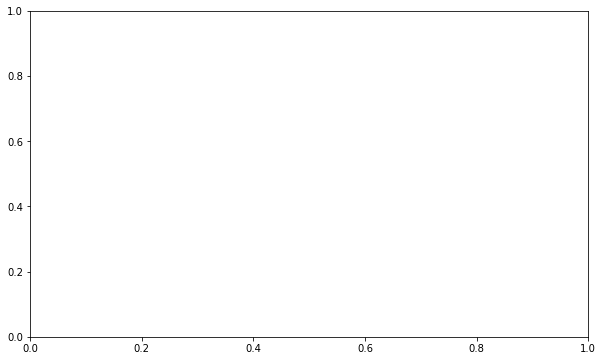

In [51]:
# Create a DataFrame from the AIC values
columns = ['AIC', 'p', 'd', 'q', 'P', 'D', 'Q']
aic_df = pd.DataFrame(aicVals, columns=columns)

# Find the row with the minimum AIC
best_model = aic_df.loc[aic_df['AIC'].idxmin()]

# Display the table
print("AIC Values:")
print(aic_df)

# Display the best model
print("\nBest Model:")
print(best_model)

# Plot AIC values
plt.figure(figsize=(10, 6))
plt.plot(aic_df.index, aic_df['AIC'], marker='o')
plt.title('AIC Values for SARIMA Models')
plt.xlabel('Model Index')
plt.ylabel('AIC')
plt.show()

### Make one-step-ahead forecasts of the last 10 observations. Determine the forecast errors.

In [53]:
# Fit an ARIMA model
model = ARIMA(df['interest'], order=(1, 1, 1))
fit_model = model.fit()

# Make one-step-ahead forecasts for the last 10 observations
forecasts = fit_model.get_forecast(steps=10)
forecast_values = forecasts.predicted_mean

# Actual values of the last 10 observations
actual_values = df['interest'].tail(10)

# Calculate forecast errors (Mean Squared Error in this example)
mse = mean_squared_error(actual_values, forecast_values)
print("Mean Squared Error:", mse)

# Print forecasts and actual values
print("One-step-ahead forecasts:", forecast_values)
print("Actual values:", actual_values)

Mean Squared Error: 14.34008097769887
One-step-ahead forecasts: 4470   -0.583790
4471    0.965340
4472    1.723502
4473    2.094556
4474    2.276154
4475    2.365030
4476    2.408527
4477    2.429815
4478    2.440234
4479    2.445333
Name: predicted_mean, dtype: float64
Actual values: 4525    6.951849
4526    4.821684
4527   -0.191720
4528    5.821128
4529    6.179216
4530    1.715079
4531    2.070262
4532    2.215865
4533    2.469674
4534   -3.749081
Name: interest, dtype: float64


/Users/MP/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [54]:
# Define the start index based on your data and forecasting approach
start_index = # Add your start index here

# Fit SARIMA model
model = SARIMAX(df['interest'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
results = model.fit()

# Get the predicted values
predicted_values = results.get_prediction(start=start_index).predicted_mean

# Calculate the forecast errors
forecast_errors = df['interest'][start_index:] - predicted_values

# Calculate Mean Squared Error
mse = np.mean(forecast_errors**2)
print(f"Mean Squared Error: {mse}")

# Print one-step-ahead forecasts, actual values, and predicted values
print("One-step-ahead forecasts:")
print(predicted_values.head())
print("Actual values:")
print(df['interest'][start_index:].head())

# Create a line graph to visualize forecast errors
plt.plot(forecast_errors, marker='o', linestyle='-')
plt.title('Forecast Errors')
plt.xlabel('Observation')
plt.ylabel('Forecast Error')
plt.show()

SyntaxError: invalid syntax (3788578689.py, line 2)

In [55]:
# Calculate forecast errors, handling missing values
forecast_errors = actual_values.sub(forecast_values, fill_value=0)

# Display the list of errors
print("Forecast Errors for Each Observation:")
print(forecast_errors.tolist())

Forecast Errors for Each Observation:
[0.5837904954138144, -0.965339638180793, -1.7235021267185715, -2.0945557564688397, -2.276153762479907, -2.365029960266709, -2.4085270156944945, -2.4298149856797364, -2.4402335683087357, -2.445332545058165, 6.95184861595744, 4.82168411390892, -0.19171999969304, 5.82112754664031, 6.17921585248158, 1.71507942828023, 2.07026206591277, 2.21586529013412, 2.46967432530594, -3.74908053164233]


### Task: "Make a time series plot of the data, and further calculate and illustrate the sample autocorrelation and partial autocorrelation (PA). Is there significant autocorrelation in the chosen time series?”

In [56]:
df.head()

,country,year,interest,Diff1
1,Aruba,1988,6.918180,0.442746
2,Aruba,1989,6.264234,-0.653946
3,Aruba,1990,4.566641,-1.697593
4,Aruba,1991,4.791125,0.224484
5,Aruba,1992,6.528138,1.737012


AttributeError: 'Series' object has no attribute 'predicted_mean'

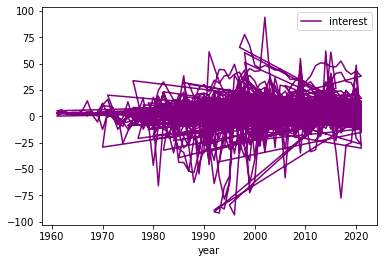

In [57]:
ax1 = df.plot(x="year", y="interest", color="purple")
# df_test.plot(x="Date", y="Electricity", color="blue")
# plt.plot(df["Date"].iloc[split:], df_test["Electricity"], color="green")

forecast_values.predicted_mean.plot(ax = ax1, label="Forecast")

ax1.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="yellow",
    alpha=0.5
)

## Data Visualisation Dashboard
The dataset for this part of the assessment was the same one used for the Machine Learning for Business Time Series Analysis on real interest rates. 

In [58]:
df.head()

,country,year,interest,Diff1
1,Aruba,1988,6.918180,0.442746
2,Aruba,1989,6.264234,-0.653946
3,Aruba,1990,4.566641,-1.697593
4,Aruba,1991,4.791125,0.224484
5,Aruba,1992,6.528138,1.737012


In [59]:
# Filter rows where 'country' is 'United States of America'
df_usa = df[df['country'] == 'United States'].copy()

# Reset index if needed
# df_usa.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df_usa)

            country  year  interest     Diff1
4163  United States  1961  3.107885  5.431782
4164  United States  1962  3.215346  0.107461
4165  United States  1963  3.374882  0.159536
4166  United States  1964  2.951669 -0.423213
4167  United States  1965  2.565913 -0.385756
...             ...   ...       ...       ...
4219  United States  2017  2.156099 -0.328431
4220  United States  2018  2.441415  0.285316
4221  United States  2019  3.427090  0.985675
4222  United States  2020  2.210411 -1.216679
4223  United States  2021 -1.189357 -3.399768

[61 rows x 4 columns]


In [62]:
pn.extension('plotly')

In [74]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 4163 to 4223
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   61 non-null     object 
 1   year      61 non-null     int64  
 2   interest  61 non-null     float64
 3   Diff1     61 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ KB


In [75]:
df_usa.describe()

,year,interest,Diff1
count,61.000000,61.000000,61.000000
mean,1991.000000,3.631183,0.018599
std,17.752934,2.306706,1.427917
min,1961.000000,-1.281419,-3.399768
25%,1976.000000,2.107311,-0.654752
50%,1991.000000,3.068643,-0.243194
75%,2006.000000,5.592238,0.882300
max,2021.000000,8.594620,5.431782


In [77]:
df_usa = df_usa.drop('Diff1', axis=1)

In [78]:
df_usa.head()

,country,year,interest
4163,United States,1961,3.107885
4164,United States,1962,3.215346
4165,United States,1963,3.374882
4166,United States,1964,2.951669
4167,United States,1965,2.565913


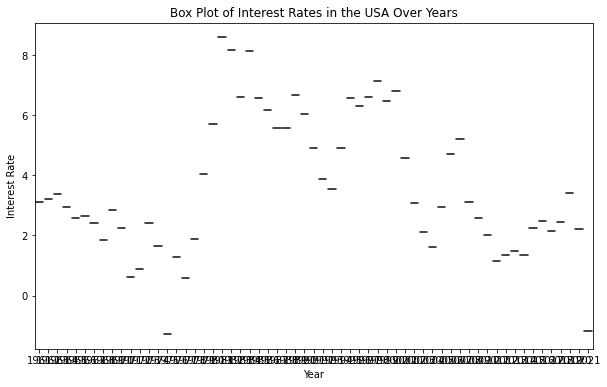

In [79]:
# Box Plot: Display a box plot to visualize the summary statistics of interest rates, including median, 
# quartiles, and potential outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_usa['year'], y=df_usa['interest'])
plt.title('Box Plot of Interest Rates in the USA Over Years')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.show()

In [119]:
# Interactive scatter plot with hover
fig = px.scatter(df_usa, x='year', y='interest', color='country', size_max=10, title='Scatter Plot of Interest Over Years by Country')
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Interest')

# Show the interactive plot
fig.show()

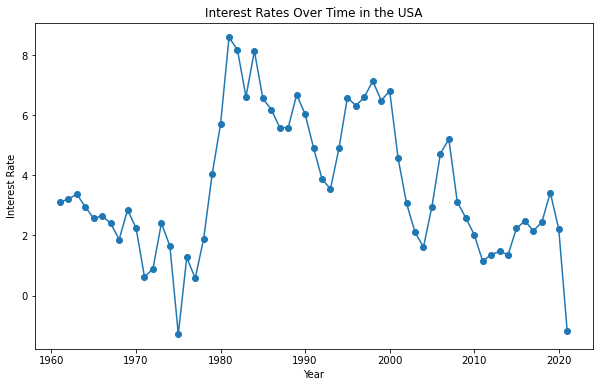

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df_usa['year']), np.array(df_usa['interest']), marker='o', linestyle='-')
plt.title('Interest Rates Over Time in the USA')
plt.xlabel('Year')
plt.ylabel('Interest Rate')

# Save the plot with the name 'usa_line.png'
plt.savefig('usa_line.png')

# Show the plot
plt.show()

In [ ]:
# Histogram or Kernel Density Plot: Show the distribution of interest rates across all years. This can help identify patterns and provide an 
# overview of the data's central tendency and variability.

fig = px.histogram(df_usa, x='interest', marginal='rug', hover_data=['year'],
                   title='Distribution of Interest Rates in the USA',
                   labels={'interest': 'Interest Rate'},
                   opacity=0.7)

fig.update_layout(
    xaxis_title='Interest Rate',
    yaxis_title='Frequency',
    showlegend=False
)

fig.show()

In [102]:
fig1 = px.scatter(df_usa, x='year', y='interest', hover_data=['year'],
                 title='Scatter Plot of Interest Rates in the USA',
                 labels={'interest': 'Interest Rate'},
                 opacity=0.7)

fig1.update_layout(
    xaxis_title='Year',
    yaxis_title='Interest Rate',
    showlegend=False
)

fig1.show()

In [69]:
df_usa.describe()

,year,interest,Diff1
count,61.000000,61.000000,61.000000
mean,1991.000000,3.631183,0.018599
std,17.752934,2.306706,1.427917
min,1961.000000,-1.281419,-3.399768
25%,1976.000000,2.107311,-0.654752
50%,1991.000000,3.068643,-0.243194
75%,2006.000000,5.592238,0.882300
max,2021.000000,8.594620,5.431782


In [117]:
# Filter rows for 'United States' and 'United Kingdom' from years 1976 to 2021
filtered_df = df[(df['country'].isin(['United States', 'United Kingdom'])) & (df['year'] >= 1976)]

# Pivot the DataFrame for easy plotting
pivot_df = filtered_df.pivot(index='year', columns='country', values='interest')

# Plot the line graph
plt.figure(figsize=(12, 8))
plt.plot(pivot_df.index, pivot_df['United States'], label='United States', marker='o')
plt.plot(pivot_df.index, pivot_df['United Kingdom'], label='United Kingdom', marker='o')

plt.title('Interest Rates Comparison: United States vs United Kingdom (1976-2021)')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

TypeError: 'ellipsis' object is not subscriptable

In [ ]:
#Filter rows for 'United States' and 'United Kingdom' from years 1976 to 2021
filtered_df = df[(df['country'].isin(['United States', 'United Kingdom'])) & (df['year'] >= 1976)]

# Pivot the DataFrame for easy plotting
pivot_df = filtered_df.pivot(index='year', columns='country', values='interest').reset_index()

# Create a line graph with hover function using Plotly Express
fig = px.line(pivot_df, x='year', y=['United States', 'United Kingdom'],
              labels={'value': 'Interest Rate'},
              title='Interest Rates Comparison: United States vs United Kingdom (1976-2021)')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Interest Rate',
    legend_title='Country',
    hovermode='x unified'
)

fig.show()

In [103]:
# Filter rows for 'United States' and 'United Kingdom' from years 1976 to 2014
filtered_df = df[(df['country'].isin(['United States', 'United Kingdom'])) & (df['year'].between(1976, 2014))]

# Pivot the DataFrame for easy plotting
pivot_df = filtered_df.pivot(index='year', columns='country', values='interest').reset_index()

# Create a line graph with hover function using Plotly Express
fig2 = px.line(pivot_df, x='year', y=['United States', 'United Kingdom'],
              labels={'value': 'Interest Rate'},
              title='Interest Rates Comparison: United States vs United Kingdom (1976-2014)')

fig2.update_layout(
    xaxis_title='Year',
    yaxis_title='Interest Rate',
    legend_title='Country',
    hovermode='x unified'
)

fig2.show()

In [87]:
# Create an interactive histogram using Plotly Express
fig = px.histogram(df, x='interest', color='country', title='Interest Distribution by Country',
                   labels={'interest': 'Interest Rate'},
                   opacity=0.7, marginal='rug')

# Update the layout for better readability
fig.update_layout(barmode='overlay', xaxis_title='Interest Rate', yaxis_title='Frequency')

# Show the interactive histogram
fig.show()

In [101]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['country'].unique()],
        value=df['country'].unique()[0],  # Set default value to the first country
        style={'width': '50%'}
    ),
    dcc.Graph(id='histogram')
])

# Define callback to update the histogram based on the selected country
@app.callback(
    dash.dependencies.Output('histogram', 'figure'),
    [dash.dependencies.Input('country-dropdown', 'value')]
)
def update_histogram(selected_country):
    filtered_df = df[df['country'] == selected_country]

    fig = px.histogram(filtered_df, x='interest', title=f'Interest Distribution in {selected_country}',
                       labels={'interest': 'Interest Rate'}, opacity=0.7, marginal='rug')

    fig.update_layout(barmode='overlay', xaxis_title='Interest Rate', yaxis_title='Frequency')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8054)

In [93]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df_usa['country'].unique()],
        value=df_usa['country'].unique()[0],  # Set default value to the first country
        style={'width': '50%'}
    ),
    dcc.Graph(id='histogram')
])

# Define callback to update the histogram based on the selected country
@app.callback(
    dash.dependencies.Output('histogram', 'figure'),
    [dash.dependencies.Input('country-dropdown', 'value')]
)
def update_histogram(selected_country):
    filtered_df = df_usa[df_usa['country'] == selected_country]

    fig = px.histogram(filtered_df, x='interest', title=f'Interest Distribution in {selected_country}',
                       labels={'interest': 'Interest Rate'}, opacity=0.7, marginal='rug')

    fig.update_layout(barmode='overlay', xaxis_title='Interest Rate', yaxis_title='Frequency')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

In [97]:
# Calculate summary statistics
table = df_usa.describe().reset_index()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    DataTable(
        id='table',
        columns=[{'name': col, 'id': col} for col in table.columns],
        data=table.to_dict('records')
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

In [99]:
# The text content
text_content = "The lowest real interest rate in the United States was in 1971 when it was 1.2%"

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div(
        id='text',
        children=text_content
    )
])

# Run the app on a different port and disable the reloader
if __name__ == '__main__':
    app.run_server(debug=True, port=8052, use_reloader=False)

## Plan for the dashboard layout: 
#### Row 1: Interactive histogram where you can choose country, usa scatter, comparison to uk.
#### Row 2: statistic info on USA, line of USA, text information. 

In [121]:
# Scatter Plot
fig1 = px.scatter(df_usa, x='year', y='interest', hover_data=['year'],
                  title='Scatter Plot of Interest Rates in the USA',
                  labels={'interest': 'Interest Rate'},
                  opacity=0.7)

fig1.update_layout(
    xaxis_title='Year',
    yaxis_title='Interest Rate',
    showlegend=False
)


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df_usa['country'].unique()],
        value=df_usa['country'].unique()[0],  # Set default value to the first country
        style={'width': '50%'}
    ),
    dcc.Graph(id='scatter-plot', figure=fig1),
    dcc.Graph(id='histogram'),  # This graph can be updated using callback as before

    # Statistics Table
    dash_table.DataTable(
        id='statistics-table',
        columns=[
            {'name': col, 'id': col} for col in df_usa.describe().reset_index().columns
        ],
        data=df_usa.describe().reset_index().to_dict('records')
    ),

    # Text Box
    dcc.Markdown(
        id='text-box',
        children="The lowest real interest rate in the United States was in 1971 when it was 1.2%"
    )
])

# Define callback to update the histogram based on the selected country
@app.callback(
    Output('histogram', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_histogram(selected_country):
    filtered_df = df_usa[df_usa['country'] == selected_country]

    fig = px.histogram(filtered_df, x='interest', title=f'Interest Distribution in {selected_country}',
                       labels={'interest': 'Interest Rate'}, opacity=0.7, marginal='rug')

    fig.update_layout(barmode='overlay', xaxis_title='Interest Rate', yaxis_title='Frequency')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8054)

### Machine Learning for Business - Text Analytics

Discuss the concept and application of Text Analytics (eg text categorisation, topic modelling and document summarisation) using machine learning modelling by providing a real-world data set of social media posts. 
Apply appropriate text analytics tools to the chosen dataset. 


### Bag of words

In [ ]:
dftxt = pd.read_csv('Reddit_Data.csv')


In [ ]:
type(data)

In [ ]:
dftxt.head()

In [ ]:
dftxt.shape

In [ ]:
# Assuming 'text_column' is the name of the column containing text data in your DataFrame
text_data = dftxt['clean_comment']

# Replace NaN values with an empty string
text_data = text_data.fillna('')

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# Convert the result to a DataFrame for better readability (optional)
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the bag-of-words DataFrame
print(bow_df)

In [ ]:
dftxt = pd.read_csv('Reddit_Data.csv')

In [ ]:
cv = sk_txt.CountVectorizer(stop_words='english')

In [ ]:
X = cv.fit_transform(df).toarray()

In [ ]:
nb = MultinomialNB()

In [ ]:
# Assuming 'text_column' is the name of the column containing text data in your DataFrame
text_data = dftxt['clean_comment']

# Replace NaN values with an empty string
text_data = text_data.fillna('')

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# No target variable is needed for unsupervised learning
# Split the dataset into training and testing sets without specifying the target variable
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Assuming you have a target variable 'target_column' in your DataFrame
y = dftxt['category']
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

# Create and fit a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
report_cv = classification_report(y_test, y_pred)

In [ ]:
print(report_cv)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(X_test[2])

In [ ]:
# Assuming 'clean_comment' is the name of the column containing text data in your DataFrame
text_data = dftxt['clean_comment']

# Replace NaN values with an empty string
text_data = text_data.fillna('')

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# No target variable is needed for unsupervised learning
# Split the dataset into training and testing sets without specifying the target variable
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Assuming you have a target variable 'target_column' in your DataFrame
y = df['category']
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Topic Modelling 

In [ ]:
dftxt = pd.read_csv('Reddit_Data.csv')

In [ ]:
# Join all text into one long string
all_text = ' '.join(dftxt['clean_comment'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Get our stop words, like 'and' and 'on'
stop_words = stopwords.words('english')

In [ ]:
# Helper function to turn our sentences into a list of words
# Yeild means that it returns a generator function ie it won't run all at once, but only as needed
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
# Helper function to remove stopwords
def remove_stopwords(texts, stopwords=stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
# Getting our texts in a list to process
texts = dftxt['clean_comment'].values.tolist()

In [ ]:
words = list(sent_to_words(texts))

In [ ]:
words = remove_stopwords(words) 

In [ ]:
len(words)

In [ ]:
words[0]

In [ ]:
# Make a dictionary of ids for the words
id2word = corpora.Dictionary(words)

In [ ]:
id2word

In [ ]:
# Translates our words into their correspoinding ids
corpus = [id2word.doc2bow(text) for text in words]

In [ ]:
corpus

In [ ]:
# Based on 'expert knowledge'
num_topics = 20

In [ ]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [ ]:
pprint(lda_model.print_topics())

In [ ]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [ ]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [ ]:
LDAvis_prepared

### Redo analysis

In [ ]:
# Adding more stop words based on 'expert knowledge' and some data exploration
stop_words.extend(['still', 'like'])

In [ ]:
texts = dftxt['processed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words)

# Processing for the word cloud (remember it needs one long string)
long_list = []
for text in words:
    long_list.extend(text)

long_string = ','.join(long_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
dftxt['processed_text'] = dftxt['clean_comment'].apply(lambda x: re.sub('[,\\.!?]', '', str(x)) if pd.notna(x) else '')
dftxt['processed_text'] = dftxt['processed_text'].apply(lambda x: x.lower())

In [ ]:
texts = dftxt['processed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

# Processing for the word cloud (remember it needs one long string)
long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
LDAvis_prepared

In [ ]:
len(words)

In [ ]:
words[0]

In [ ]:
# Adding our predicted topic (based on highest affinity score) and the corresponding score to the dataframe
predicted_topics = []
predicted_scores = []

for word in words:
    # Gets the predicted topics for a given document
    pred_topics = lda_model.get_document_topics(id2word.doc2bow(word), minimum_probability=None)
    # Sort the predicted topics by max score
    pred_topics.sort(reverse=True, key=lambda x: x[1])
    # Add the topic and socre to their respective lists
    predicted_topics.append(pred_topics[0][0])
    predicted_scores.append(pred_topics[0][1])
dftxt['predicted_topic'] = predicted_topics
dftxt['predicted_score'] = predicted_scores

In [ ]:
dftxt.head()

In [ ]:
# Exploring how consistantly the actual groups got topics modelled to them
counts = []
for group in range(num_topics):
    # An array whose elements we can increment to count the number of time a topic appeared for a group
    count = np.zeros(num_topics)
    for prediction in df[df['group'] == group].dropna()['predicted_topic']:
        count[int(prediction)] += 1
    # appending a list of the count of the most common topic, the number of topics and the ratio of those
    counts.append([max(count), sum(count), max(count)/sum(count)])

In [ ]:
counts

### TDF-IDF 

In [ ]:
dftxt = pd.read_csv('Reddit_Data.csv')

In [ ]:
# Assuming 'sentiment' is the name of your current column with sentiment labels
# Create a new column 'target' based on sentiment labels
dftxt['target'] = dftxt['category']

# Now, 'target' contains the numerical labels for sentiment

In [ ]:
dftxt.head()

In [ ]:
# Assuming X_tfidf is your feature matrix, and df['target'] is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, dftxt['target'], test_size=0.3, random_state=42)

# Create and train your classifier (e.g., Naive Bayes)
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the classifier
report_cv = classification_report(y_test, y_pred)
print(report_cv)

In [ ]:
tfidf = sk_text.TfidfVectorizer(dtype=np.float32)

In [ ]:
X_tfidf = tfidf.fit_transform(df).toarray()

In [ ]:
print("Shape of X_tfidf:", X_tfidf.shape)
print("Length of df['category']:", len(df['category']))

In [ ]:
# Assuming 'clean_comment' is the column containing your text data
corpus = dftxt['clean_comment'].astype(str).values

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # You can adjust max_features as needed

# Generate the TF-IDF matrix
X_tfidf = tfidf.fit_transform(corpus).toarray()

# Assuming 'category' is the target variable
y = dftxt['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the classifier
report_cv = classification_report(y_test, y_pred, target_names=df['category'].unique())
print(report_cv)